In [1]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
def load_dataset_withfeatures_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is epxected to be comma-separated, while separate examples are separated by new line.
    All but the last column are expected to be features, the last columns is parsed as output variable."""
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, :-1].to_numpy()
    y = df.iloc[:, -1].to_numpy()
    le = LabelEncoder()
    y = le.fit_transform(y)
   
    feature_names = df.iloc[:, :-1].columns.tolist()

    return X, y, feature_names

In [3]:
def kfold_crossval(classifier, X, y, k=10):
    """Function to evaluate a scikit learn model in 10-fold shuffled
    split cross validation. 
    """
    # TODO:
    # Estimate model performance for given classifier
    # Evaluate on k-fold split the validation and train error
        # HINT: we are working with classes and classification data
        # What does this mean for the cross validation method?
    # Return metric for model selection
    kf = StratifiedShuffleSplit(n_splits=k, train_size=0.9, random_state=20)
    train_error_arr = np.empty((k,))
    val_error_arr = np.empty((k,))
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
        
        classifier.fit(X_train, y_train)
        y_val_predict = classifier.predict(X_val)
        y_train_predict = classifier.predict(X_train)
        
        validierungserror = accuracy_score(y_val, y_val_predict)
        trainingserror = accuracy_score(y_train, y_train_predict)
        train_error_arr[i] = trainingserror
        val_error_arr[i] = validierungserror
    
        
    mean_train_loss = np.mean(train_error_arr)
    mean_predict_loss = np.mean(val_error_arr)
    
    return mean_train_loss, mean_predict_loss

In [4]:
def test_classifer_hyperparams(X, y, classifier,hyperparam_name, hyperparam_values):
    """Tests different classifiers for different values of a hyper parameter given to the function."""

    # TODO:
    # This is how I have done it, this can possibly be split into two functions
    # Carry out accuracy estimation (crossval) on models with different hyperparams
    # Plot results against hyperparams
    # Don't forget: there are 2 things you need to plot!
    
    mean_val_scores = np.empty((len(hyperparam_values),))
    mean_train_scores  = np.empty((len(hyperparam_values),))

    for i, val in enumerate(hyperparam_values):
       
        classifier.set_params(**{hyperparam_name: val})
        
        mean_val_score, mean_train_score = kfold_crossval(classifier, X, y)
        
        mean_val_scores[i] = mean_val_score
        mean_train_scores[i] = mean_train_score
                
    return mean_val_scores, mean_train_scores

   

In [5]:
def plot_score_against_hyperparam(hyperparam_values, mean_train_scores, mean_val_scores, model):
    
    fig, ax = plt.subplots()
    ax.set_xlabel("max_depth value")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs max_depth value correspondence for training and testing sets" + "("+  model +")" )
    ax.plot(hyperparam_values, mean_train_scores, marker=".", label="train")
    ax.plot(hyperparam_values, mean_val_scores, marker=".", label="test")
    ax.legend()
    plt.show()

In [6]:
X, y, feature_names = load_dataset_withfeatures_pandas('iris_2D.csv')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Accuracies of decision tree classifier and random forest classifier are: 0.7 and 0.7 respectively


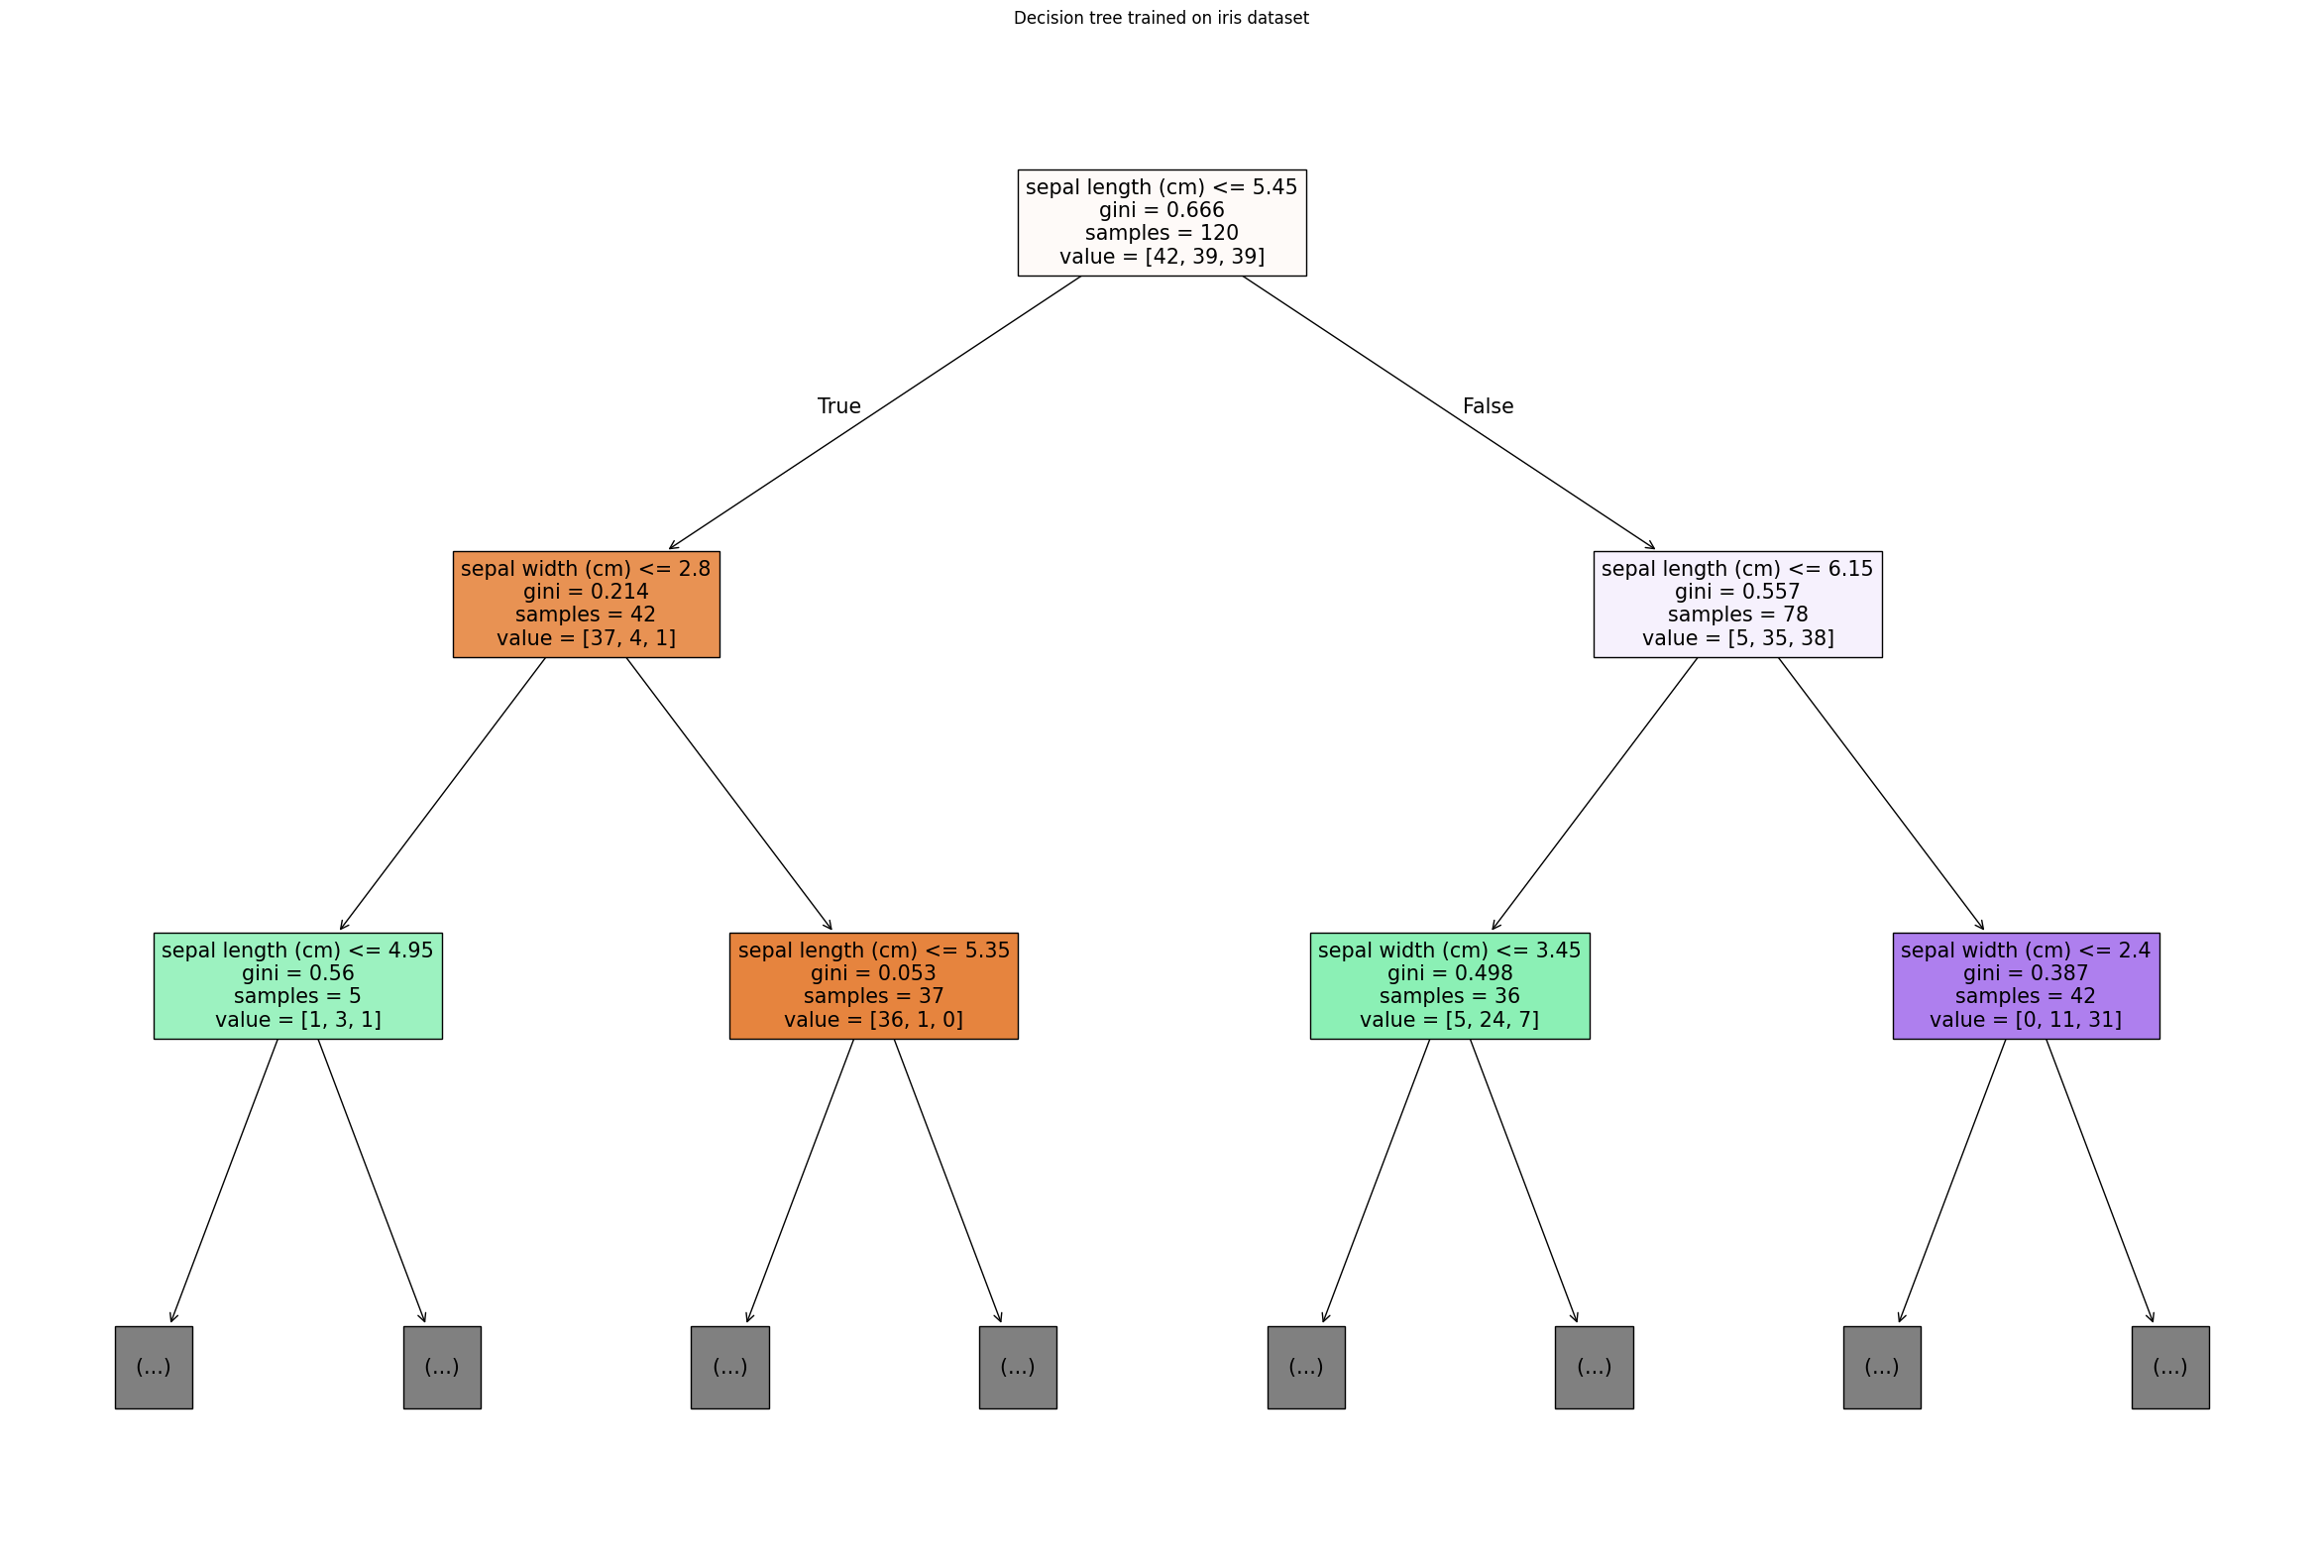

In [7]:
X, y, features = load_dataset_withfeatures_pandas("iris_2D.csv")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predict_tree = dtree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_predict_tree)
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_predict_forest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_predict_tree)
print("Accuracies of decision tree classifier and random forest classifier are: " + str(accuracy_tree) + " and "+ str(accuracy_forest) + " respectively")

clf = dtree.fit(X_train,y_train)
plt.figure(figsize = [30,20])
plot_tree(clf, filled=True,max_depth=2,feature_names = features)
plt.title("Decision tree trained on iris dataset")
plt.show()


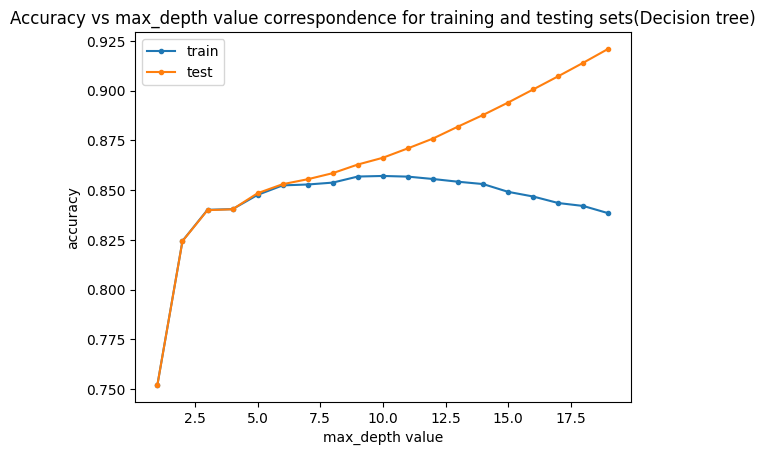

In [20]:
X, y, features = load_dataset_withfeatures_pandas("adult_onehotencoded.csv")
decisiontree = DecisionTreeClassifier()
mean_val_scores, mean_train_scores = test_classifer_hyperparams(X, y, decisiontree,hyperparam_name = "max_depth", hyperparam_values=range(1,20))
plot_score_against_hyperparam(range(1,20), mean_train_scores, mean_val_scores, model = "Decision tree")
